# JDSZ4

## Analiza poziomu zadowolenia dla poszczególnych departamentów; które parametry mają największy wpływ?

## Analiza poziomu zadowolenia w zależności od ilości podróży biznesowych.

### Mateusz Nowakowski JDSZ4

## Import znormalizowanych danych

In [221]:
import pandas as pd

df = pd.read_csv('../../dataset-normalized.csv')

### Wyliczenie kolumn związanych (nazwą) z satysfakcją

In [223]:
satisfaction_columns = []

for column in df:
    if 'satisfaction' in column.lower():
        satisfaction_columns.append(column)

print(satisfaction_columns)

# Dodanie kolumny będącą średnią arytmetyczną powyższych
df['OverallSatisfaction'] = (df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']) / 3

['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'OverallSatisfaction']


### Wyliczenie departamentów

In [225]:
df.describe()['Department'] # 0-2

count    1470.000000
mean        0.739456
std         0.527792
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Department, dtype: float64

### Definicja słownika departamentów na przyporządkowane wartości tekstowe

In [226]:
departments = {
    0: 'Sales',
    1: 'Research & Development',
    2: 'Human Resources'
}

###  Narysowanie zgrupowanego wykresu słupkowego poziomu czynników satysfakcji

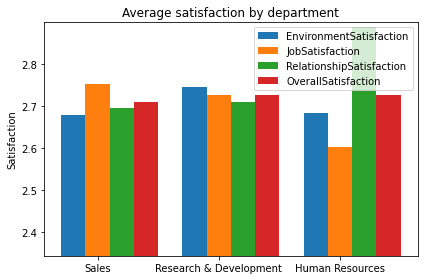

In [227]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

labels = departments.values()

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

# Dla `plt.ylim`
results_min = float('inf')
results_max = 0

for idx, satisfaction_column in enumerate(satisfaction_columns):
    results = []
    
    for department in departments:
        results.append(df.where(df['Department'] == department).dropna()[satisfaction_column].mean())
        
    if results_min > min(results):
        results_min = min(results)
        
    if results_max < max(results):
        results_max = max(results)
    
    ax.bar(x + ((idx - 1) * width), results, width, label=satisfaction_column)

ax.set_ylabel('Satisfaction')
ax.set_title('Average satisfaction by department')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.ylim([results_min - (results_min * 0.1), results_max + 0.01])
plt.show()

### Tabele korelacji

In [228]:
general = df.where(df['Department'] == 2).dropna()

general_correlation = general.corr()

filtered_corr = general_correlation[satisfaction_columns]

filtered_corr = filtered_corr.applymap(lambda x: x * 100)[lambda x: x != 100].dropna()

filtered_corr.sort_values('EnvironmentSatisfaction', ascending=False)

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,OverallSatisfaction
JobInvolvement,24.221569,-9.128397,-6.231334,4.934403
TrainingTimesLastYear,18.690161,-13.926419,1.190772,3.020649
MonthlyIncome,15.716063,4.703747,-16.451515,2.592572
MonthlyRate,15.449243,-15.162376,-2.876113,-2.003958
TotalWorkingYears,14.041816,-4.952214,-13.838457,-2.858122
JobLevel,13.428805,1.959034,-16.083564,-0.236363
Age,13.317996,-3.226518,-15.588985,-3.228149
EmployeeNumber,11.087993,-3.130354,-23.465161,-9.043085
DistanceFromHome,10.782165,-10.866121,-13.909453,-8.475816
NumCompaniesWorked,8.749997,-21.891005,12.689880,-1.077012


In [212]:
filtered_corr.sort_values('JobSatisfaction', ascending=False)

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,OverallSatisfaction
YearsSinceLastPromotion,-2.183688,12.265263,6.055876,9.831704
PerformanceRating,-5.157535,6.710811,22.821773,14.366755
MonthlyIncome,15.716063,4.703747,-16.451515,2.592572
PercentSalaryHike,-1.655315,4.183755,12.164512,8.675235
BusinessTravel,-25.878425,2.864731,4.839686,-10.594650
OverTime,8.527101,2.511611,-0.399808,6.325294
JobLevel,13.428805,1.959034,-16.083564,-0.236363
StockOptionLevel,-6.304960,0.769858,-1.028537,-3.816748
DailyRate,-12.636106,0.482417,31.579748,11.199248
YearsWithCurrManager,7.803822,-2.747825,-8.994233,-2.341448


In [104]:
filtered_corr.sort_values('RelationshipSatisfaction', ascending=False)

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction
DailyRate,-12.636106,0.482417,31.579748
PerformanceRating,-5.157535,6.710811,22.821773
NumCompaniesWorked,8.749997,-21.891005,12.689880
PercentSalaryHike,-1.655315,4.183755,12.164512
Attrition,-16.852178,-19.934079,9.490708
YearsSinceLastPromotion,-2.183688,12.265263,6.055876
BusinessTravel,-25.878425,2.864731,4.839686
HourlyRate,2.955398,-21.409957,4.488439
TrainingTimesLastYear,18.690161,-13.926419,1.190772
OverTime,8.527101,2.511611,-0.399808


In [103]:
df.corr()[satisfaction_columns]

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction
Age,0.010146,-0.004892,0.053535
Attrition,-0.103369,-0.103481,-0.045872
BusinessTravel,-0.011310,0.008666,0.008926
DailyRate,0.018355,0.030571,0.007846
Department,0.019395,-0.021001,0.022414
DistanceFromHome,-0.016075,-0.003669,0.006557
Education,-0.027128,-0.011296,-0.009118
EmployeeNumber,0.017621,-0.046247,-0.069861
EnvironmentSatisfaction,1.000000,-0.006784,0.007665
HourlyRate,-0.049857,-0.071335,0.001330


Text(0.04, 0.5, 'Shared Y')

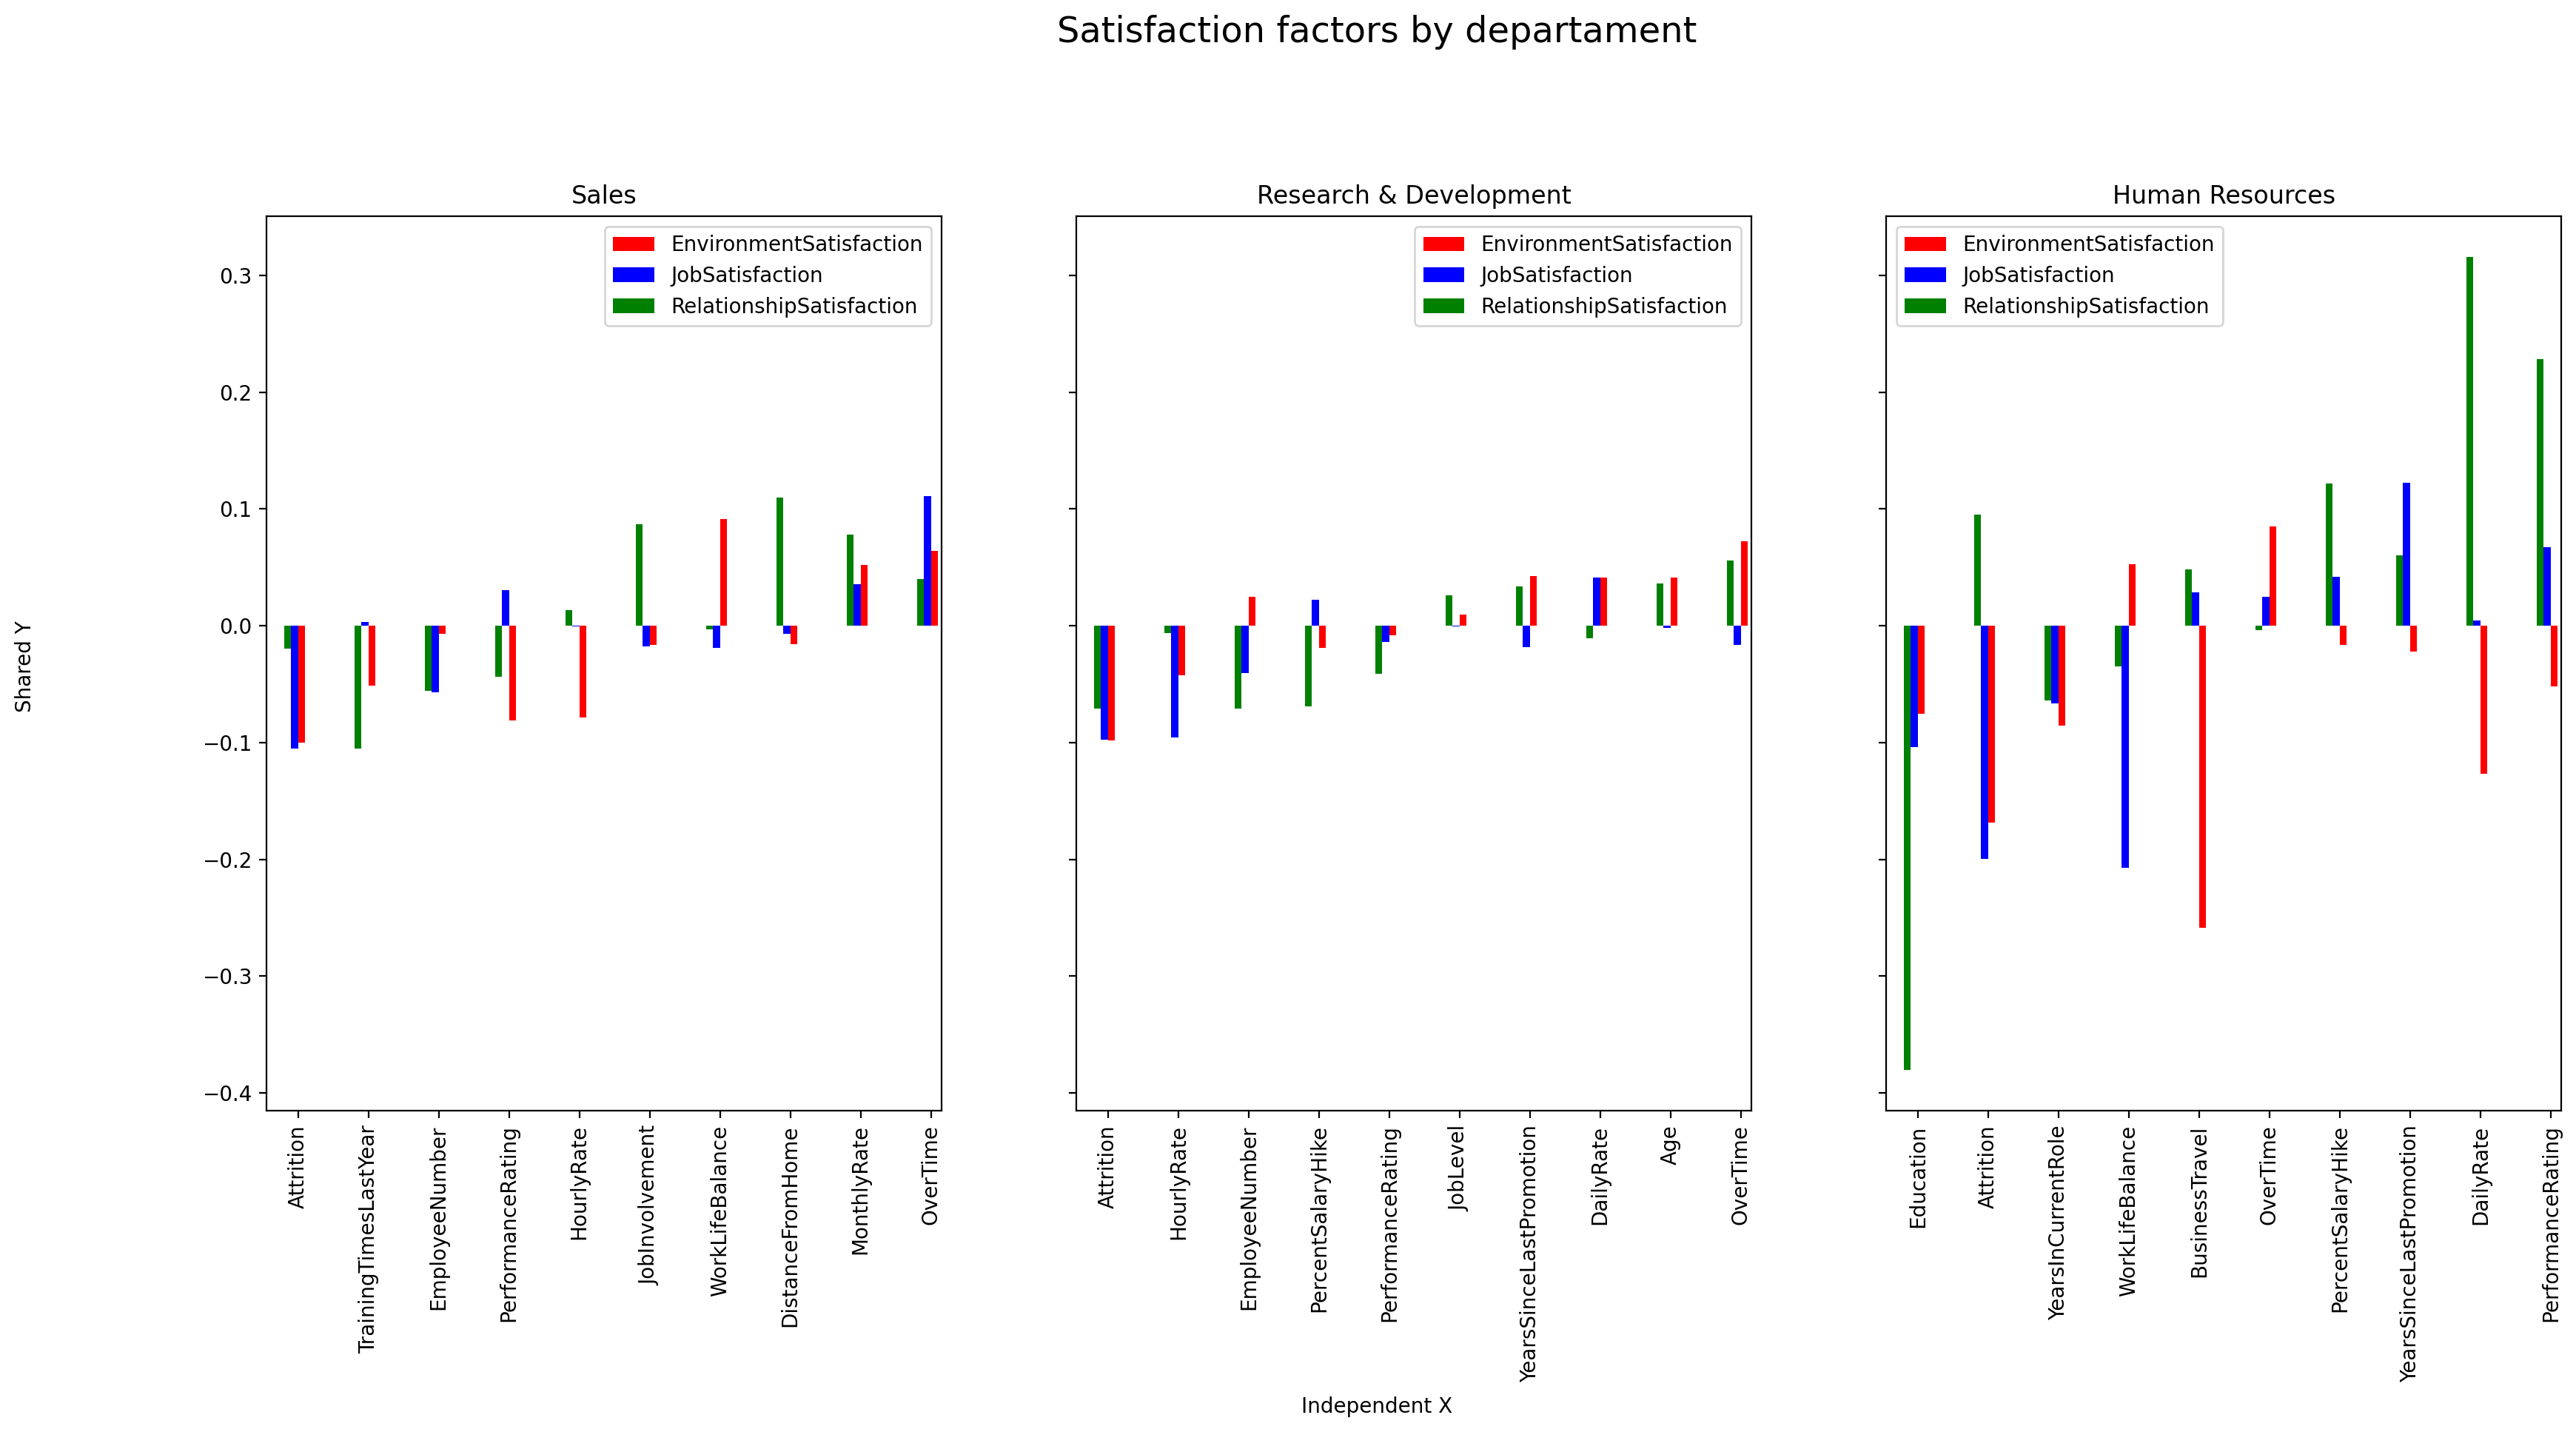

In [211]:
sample_size = 5

fig, axes = plt.subplots(figsize=(20, 8), nrows=1, ncols=len(departments), sharex=False, sharey=True, dpi=200)

for d_idx, department in enumerate(departments):
    # Shorthand dla subplotu
    ax = axes if len(departments) == 1 else axes[d_idx]
    
    # Ustawienie tytułu dla subplotu
    ax.set_title(departments[department])
    
    # Przefiltrowanie wyników; tylko iterowany departament
    results = df.where(df['Department'] == department).dropna()
    corr = results.corr()[satisfaction_columns]
    
    # Wyrzucenie korelacji *to samo*-*to samo*
    corr = corr[lambda x: x != 1].dropna()
    
    # Mapa kolorów
    colors = { 0: 'red', 1: 'blue', 2: 'green', 3: 'orange' }
    
    for idx, satisfaction_column in enumerate([n for n in satisfaction_columns if n != 'OverallSatisfaction']):
        # Sortowanie na podstawie "OverallSatisfaction", pobranie próbki iterowanej kolumny o wielkości `sample_size` 
        corr_min = corr.sort_values('OverallSatisfaction', ascending=True).head(sample_size)[satisfaction_column]
        corr_max = corr.sort_values('OverallSatisfaction', ascending=False).head(sample_size)[satisfaction_column]
        
        # Połączenie corr_min z odwróconym corr_max
        concated = pd.concat([corr_min, corr_max.iloc[::-1]], axis=0)
        
        # Narysowanie słupków
        concated.plot.bar(ax=ax, color=colors[idx], width=0.10, position=idx)
        
        # Dodanie legendy do subplotu
        ax.legend()

# Tytuł głównego wykresu
plt.suptitle('Satisfaction factors by departament', x=0.5, y=1.05, ha='center', fontsize='xx-large')

# Widok "tight layout"
# fig.tight_layout()

# Dodatkowe informacje (X, Y)
fig.text(0.5, -0.13, 'Independent X', ha='center')
fig.text(0.04, 0.5, 'Shared Y', va='center', rotation='vertical')

### Wnioski

#### Poziom zadowolenia dla poszczególnych departamentów

Dla departamentów *Sales* oraz *Research* zależności między dostępnymi danymi są bardzo niewielkie i osiągają wartość maksymalnie 10%.

Dla departamentów *Sales* oraz *Research* największa negatywna korelacja satysfakcji dotyczy parametru `Attrition` oznaczającego deklarację odchodzenia z firmy, co można wytłumaczyć w trywialny sposób. 

##### TODO: dalsze wnioski...

#### Poziom zadowolenia w zależności od ilości podróży biznesowych

Dla pracowników departamentów *Sales* oraz *Research* zależności są znikome, natomiast dla departamentu *Human Resources* podróże negatywnie wpływają na ocenę *Environment Satisfaction*, ponieważ tworzą z nią negatywną korelację osiągającą wartość -0.25, co relatywnie jest wartością odstająco niską.